<a href="https://colab.research.google.com/github/vpagonis/Classical_Mechanics_2nd_Edition/blob/main/Chapter12/Python_Codes_Chapter_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 12.1

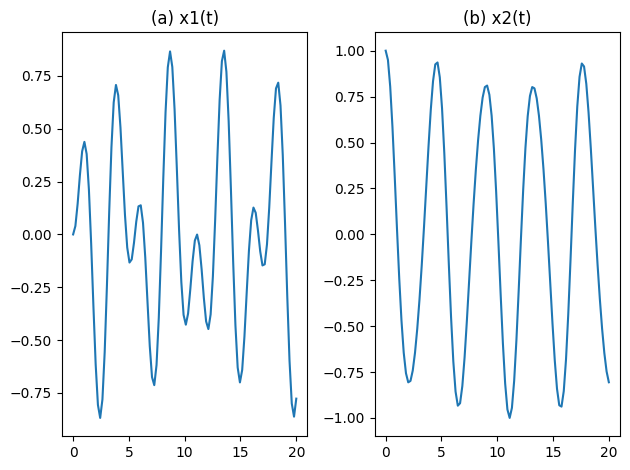

In [1]:
%reset -f

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def solveODE(X, t):
     # X :  X = [x1,y1,x2,y2]
     # t :  time
    x1, y1, x2, y2 = X

    f = [y1, k2 * (x2 - x1 ) / m1 -k1*x1/m1,
         y2, k2 * (x1 - x2 ) / m2 -k3*x2/m2]
    return f

k1, k2, k3, m1, m2 = 4, 2, 3, 1, 2   # Parameter values

# Initial conditions (x1,y1 = dx1/dt, x2, y2 = dx2/dt)
# x1, x2= initial positions, y1, y2 = initial velocities
x1, y1, x2, y2 = 0, 0, 1, 0

# times for evaluating x(t)
t = np.linspace(0,20,100)

# Pack up the parameters and initial conditions:
X = [x1, y1, x2, y2]

# Call the ODE solver.
soln = odeint(solveODE, X, t)

plt.subplot(1,2,1)
plt.plot(t, soln[:,0])
plt.title('(a) x1(t)')

plt.subplot(1,2,2)
plt.plot(t, soln[:,2])
plt.title('(b) x2(t)')
plt.tight_layout()
plt.show()


# Example 12.2

---------------------------- CODE OUTPUT ----------------------------- 

x1(t) = a*cos(sqrt(3)*sqrt(k)*t/sqrt(m))

x2(t) = -a*cos(sqrt(3)*sqrt(k)*t/sqrt(m))


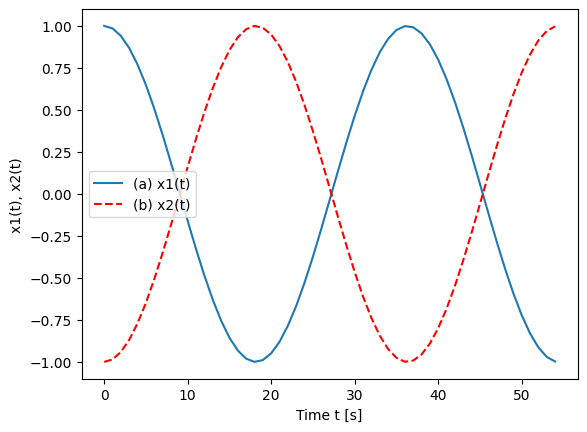

In [8]:
%reset -f

from sympy import Function,  Eq, Derivative as D, symbols,\
lambdify, simplify
from sympy.solvers.ode.systems import dsolve_system
import numpy as np
import matplotlib.pyplot as plt
print('-'*28,'CODE OUTPUT','-'*29,'\n')

k, m, t, x0, v0, a = symbols('k, m, t, x0, v0, a',real=True,\
positive=True)
x1, x2 = symbols('x1, x2', cls=Function)

eq1 = Eq(D(x1(t),t,t), -(k/m)* x1(t) -(k/m)*(x1(t)-x2(t)))
eq2 = Eq(D(x2(t),t,t), -(k/m)* x2(t) -(k/m)*(x2(t)-x1(t)))

# initial conditions x1(0)=a, v1(0)=0, x2(0)=-a and v2(0)=1
initCondits = {x1(0): a, D(x1(t),t).subs(t, 0): 0,\
               x2(0): -a, D(x2(t),t).subs(t, 0): 0 }
# solve the system of two differential equations symbolically
soln = dsolve_system((eq1, eq2), [x1(t),x2(t)], t, initCondits)

X1 = soln[0][0].rhs      # extract the solutions x1(t) and x2(t)
X2 = soln[0][1].rhs
print('x1(t) =',X1)
print('\nx2(t) =',X2)

# make x1(t) and x2(t) functions using lambdify

x1soln = lambdify(t, X1.subs({k:1,m:1,a:1}),'numpy')
x2soln = lambdify(t, X2.subs({k:1,m:1,a:1}),'numpy')

# evaluate x(t) values from t=0 to t=10 s
xvals = np.arange(0,5.5,.1)

plt.plot(x1soln(xvals),label='(a) x1(t)')
plt.plot(x2soln(xvals),'r--',label='(b) x2(t)')
plt.xlabel('Time t [s]')
plt.ylabel('x1(t), x2(t)')
plt.legend()
plt.show()


# Example 12.3

---------------------------- CODE OUTPUT ----------------------------- 


x1(t) =
 a*(cos(sqrt(k)*t/sqrt(m)) - cos(sqrt(3)*sqrt(k)*t/sqrt(m)))/2

x2(t) =
 a*(cos(sqrt(k)*t/sqrt(m)) + cos(sqrt(3)*sqrt(k)*t/sqrt(m)))/2


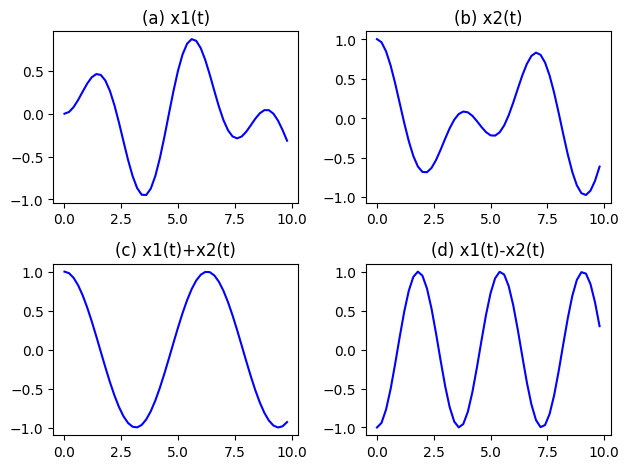

In [9]:
%reset -f

from sympy import Function,  Eq, Derivative as D, symbols,\
lambdify, simplify
from sympy.solvers.ode.systems import dsolve_system
import numpy as np
import matplotlib.pyplot as plt
print('-'*28,'CODE OUTPUT','-'*29,'\n')

k, m, t, x0, v0, a = symbols('k, m, t, x0, v0, a',real=True,\
positive=True)
x1, x2 = symbols('x1, x2', cls=Function)

def plotx(y,ttle):          # function to plot x1,x2 etc
    plt.plot(xvals,y,'b');
    plt.title(ttle);

eq1 = Eq(D(x1(t),t,t), -(k/m)* x1(t) -(k/m)*(x1(t)-x2(t)))
eq2 = Eq(D(x2(t),t,t), -(k/m)* x2(t) -(k/m)*(x2(t)-x1(t)))

# initial conditions x1(0)=0, v1(0)=0, x2(0)=0  and v2(0)=1
initCondits = {x1(0): 0, D(x1(t),t).subs(t, 0): 0,\
               x2(0): a, D(x2(t),t).subs(t, 0): 0 }
# solve the system of two differential equations symbolically
soln = dsolve_system((eq1, eq2), [x1(t),x2(t)], t, initCondits)

X1 = soln[0][0].rhs      # extract the solutions x1(t) and x2(t)
X2 = soln[0][1].rhs
print('\nx1(t) =\n',simplify(X1))
print('\nx2(t) =\n',simplify(X2))

# make x1(t) and x2(t) functions using lambdify

x1soln = lambdify(t, X1.subs({k:1,m:1,a:1}),'numpy')
x2soln = lambdify(t, X2.subs({k:1,m:1,a:1}),'numpy')

# evaluate x(t) values from t=0 to t=10 s
xvals = np.arange(0,10,.2)

plt.subplot(2,2,1)   # plot panels for x1, x2, x1+x2 and x1-x2
plotx(x1soln(xvals),'(a) x1(t)')
plt.subplot(2,2,2)
plotx(x2soln(xvals),'(b) x2(t)')
plt.subplot(2,2,3)
plotx(x1soln(xvals)+x2soln(xvals),'(c) x1(t)+x2(t)')
plt.subplot(2,2,4)
plotx(x1soln(xvals)-x2soln(xvals),'(d) x1(t)-x2(t)')
plt.tight_layout()
plt.show()



# Example 12.5

In [10]:
%reset -f

from sympy import symbols, exp, I, diff, solve, expand,  Matrix

k, m, omega, x1, x2, A1, A2, t = \
symbols("k, m, omega, x1, x2, A1, A2, t")
#  define all symbols for variables

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define x1 and x2 as complex exponentials
x1 = A1*exp(I*omega*t)
x2 = A2*exp(I*omega*t)

# differential equations for x1, x2 divided by exp(I*omega*t)
eq1 = expand((m*diff(x1,t,t)+k*x1+k*(x1-x2))/exp(I*omega*t))
eq2 = expand((m*diff(x2,t,t)+k*x2+k*(x2-x1))/exp(I*omega*t))

# Matrix A has coeffcients of A1, A2 in the system of equations
A = Matrix([[eq1.coeff(A1),eq1.coeff(A2)],[eq2.coeff(A1),eq2.coeff(A2)]])

print('The matrix of coefficients for A1, A2 is:\n')
print(A)

sol = solve(A.det(),omega)  # set det(A)=0 and solve for omega

print('\nNatural frequency omega1 = ',sol[0])
print('Natural frequency omega2 = ',sol[1])
print('\nNatural frequency omega3 = ',sol[2])
print('Natural frequency omega4 = ',sol[3])


---------------------------- CODE OUTPUT ----------------------------- 

The matrix of coefficients for A1, A2 is:

Matrix([[2*k - m*omega**2, -k], [-k, 2*k - m*omega**2]])

Natural frequency omega1 =  -sqrt(3)*sqrt(k/m)
Natural frequency omega2 =  sqrt(3)*sqrt(k/m)

Natural frequency omega3 =  -sqrt(k/m)
Natural frequency omega4 =  sqrt(k/m)


# Example 12.6

In [15]:
%reset -f

from sympy import Matrix, symbols

print('-'*28,'CODE OUTPUT  - Part (a)','-'*29,'\n')

k, m = symbols('k, m')

A = Matrix([[2*k/m,-k/m],[-k/m,2*k/m]])

omega_sq = list(A.eigenvals().keys())

eigenvects = list(A.eigenvects())

print('The square of the first frequency is: ',omega_sq[0])

print('\nThe first eigenvector is: ',eigenvects[1][2][0])

print('\nThe square of the second frequency is: ',omega_sq[1])

print('\nThe second eigenvector is: ',eigenvects[0][2][0])

from sympy import Matrix, symbols, sqrt, simplify

print('\n','-'*28,'CODE OUTPUT  - Part (b)','-'*29,'\n')

k, m1, m2, z = symbols('k, m1, m2, z')

A = Matrix([[2*k/m1,-k/m1],[-k/m2,2*k/m2]])

omega_sq = list(A.eigenvals())

eigenvects = list(A.eigenvects())

print('The square of the first frequency is:\n',\
   simplify(omega_sq[0].subs(sqrt(m1**2 - m1*m2 + m2**2),z)))

print('\nThe square of the second frequency is:\n',\
   simplify(omega_sq[1].subs(sqrt(m1**2 - m1*m2 + m2**2),z)))

print('\nAfter the z-substitution, the eigenvector #1 is:')
u = eigenvects[0][2][0]
print(simplify(u.subs(sqrt(m1**2 - m1*m2 + m2**2),z)))

print('\nAfter the z-substitution, the eigenvector #2 is:')
u = eigenvects[1][2][0]
print(simplify(u.subs(sqrt(m1**2 - m1*m2 + m2**2),z)))




---------------------------- CODE OUTPUT  - Part (a) ----------------------------- 

The square of the first frequency is:  3*k/m

The first eigenvector is:  Matrix([[-1], [1]])

The square of the second frequency is:  k/m

The second eigenvector is:  Matrix([[1], [1]])

 ---------------------------- CODE OUTPUT  - Part (b) ----------------------------- 

The square of the first frequency is:
 k*(m1 + m2 - z)/(m1*m2)

The square of the second frequency is:
 k*(m1 + m2 + z)/(m1*m2)

After the z-substitution, the eigenvector #1 is:
Matrix([[(m1 - m2 + z)/m1], [1]])

After the z-substitution, the eigenvector #2 is:
Matrix([[(m1 - m2 - z)/m1], [1]])


# Example 12.7

In [16]:
%reset -f

from sympy import Matrix, symbols, solve, det

print('-'*28,'CODE OUTPUT','-'*29,'\n')

k, m, L, omega, g, A1, A2 = symbols('k, m,  L, omega, g, A1, A2')

A = Matrix([[2*m*(-L*omega**2+g),-m*L*omega**2],\
            [-m*L*omega**2,-m*(L*omega**2 - g)]])

omega_vals = solve(det(A),omega)

print('Eigenvalues #1 is: ',omega_vals[0])
print('\nEigenvalues #2 is: ',omega_vals[1])
print('\nEigenvalues #3 is: ',omega_vals[2])
print('\nEigenvalues #4 is: ',omega_vals[3])


---------------------------- CODE OUTPUT ----------------------------- 

Eigenvalues #1 is:  -sqrt(-sqrt(2)*g/L + 2*g/L)

Eigenvalues #2 is:  sqrt(-sqrt(2)*g/L + 2*g/L)

Eigenvalues #3 is:  -sqrt(sqrt(2)*g/L + 2*g/L)

Eigenvalues #4 is:  sqrt(sqrt(2)*g/L + 2*g/L)
